In [162]:
import re
import docx2txt
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## Extract programming language from Knowledge Graph

In [163]:
file_name_1 = 'Mathew Elliot.docx'
file_name_2 = 'John Guy.docx'
file_name_3 = 'Max Payne.docx'

In [164]:
def extract_programming_languages(file_name):
    # read in word file
    result = docx2txt.process(file_name)
    programming_languages_pattern = re.search(r'Programming Languages:[A-Za-z,\s0-9]*\.',result)
    programming_languages_line = programming_languages_pattern.group(0)

    languages = re.sub("Programming Languages: ","", programming_languages_line)
    languages = re.sub("\.","",languages)
    languages_clean = languages.split(', ')
    print(languages_clean)
    return languages_clean

In [193]:
name_1 = file_name_1.split('.')[0]
name_2 = file_name_2.split('.')[0]
name_3 = file_name_3.split('.')[0]

languages_mathew = extract_programming_languages(file_name_1)
languages_john = extract_programming_languages(file_name_2)
languages_max = extract_programming_languages(file_name_3)

['JavaScript', 'HTML5', 'PHP', 'CSS', 'SQL', 'MySQL']
['Python', 'R', 'CSS', 'SQL']
['HTML5', 'CSS', 'MySQL', 'Jquery', 'PHP']


## Create and Visualize a Knowledge Graph

In [171]:
names = [name_1,name_2,name_3]

def draw_graph(e_dict):
    # create a directed-graph from a dataframe
    G=nx.from_dict_of_lists(e_dict,create_using=nx.MultiDiGraph())
    plt.figure(figsize=(12,12))
    
    pos = nx.spring_layout(G)
    nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos, node_size = 4500, font_size = 18)
    plt.show()


### Knowledge Graph - Single Candidate

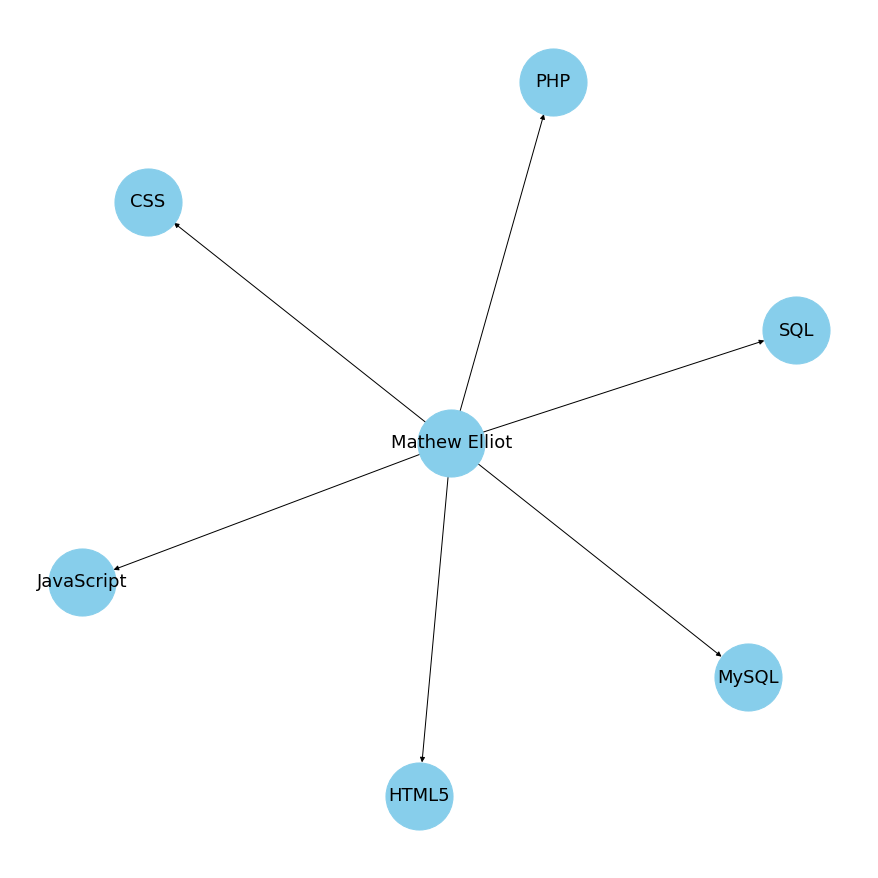

In [172]:
edge_dict = {}
edge_dict[names[0]] = languages_mathew

draw_graph(edge_dict)

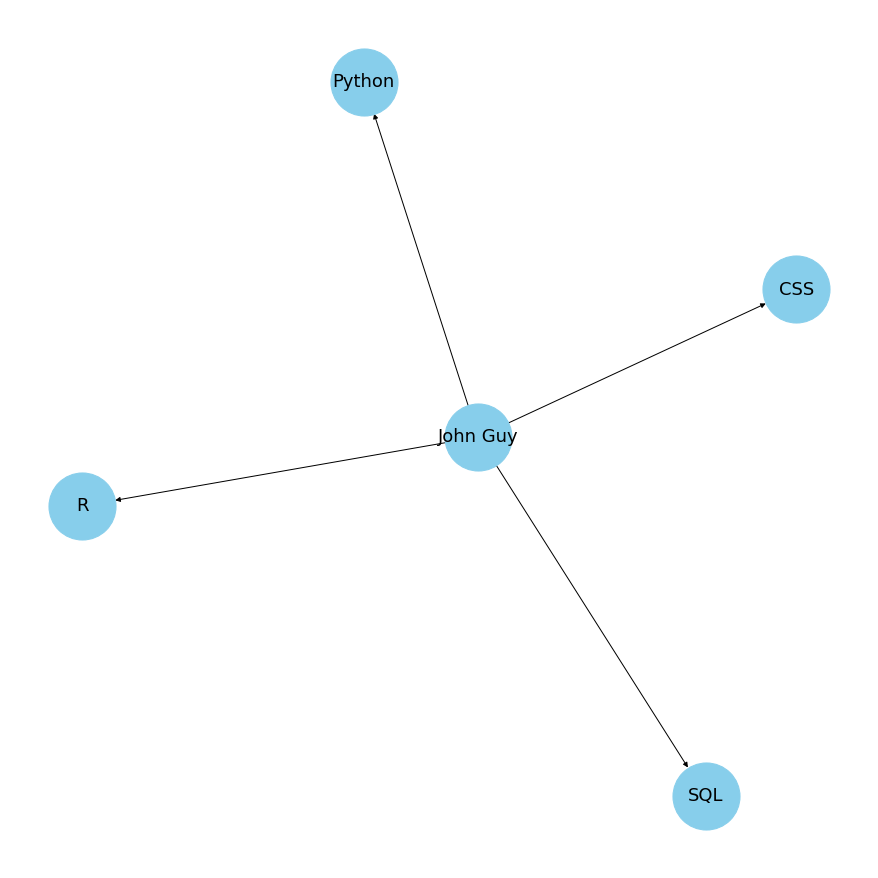

In [175]:
edge_dict = {}
edge_dict[names[1]] = languages_john

draw_graph(edge_dict)

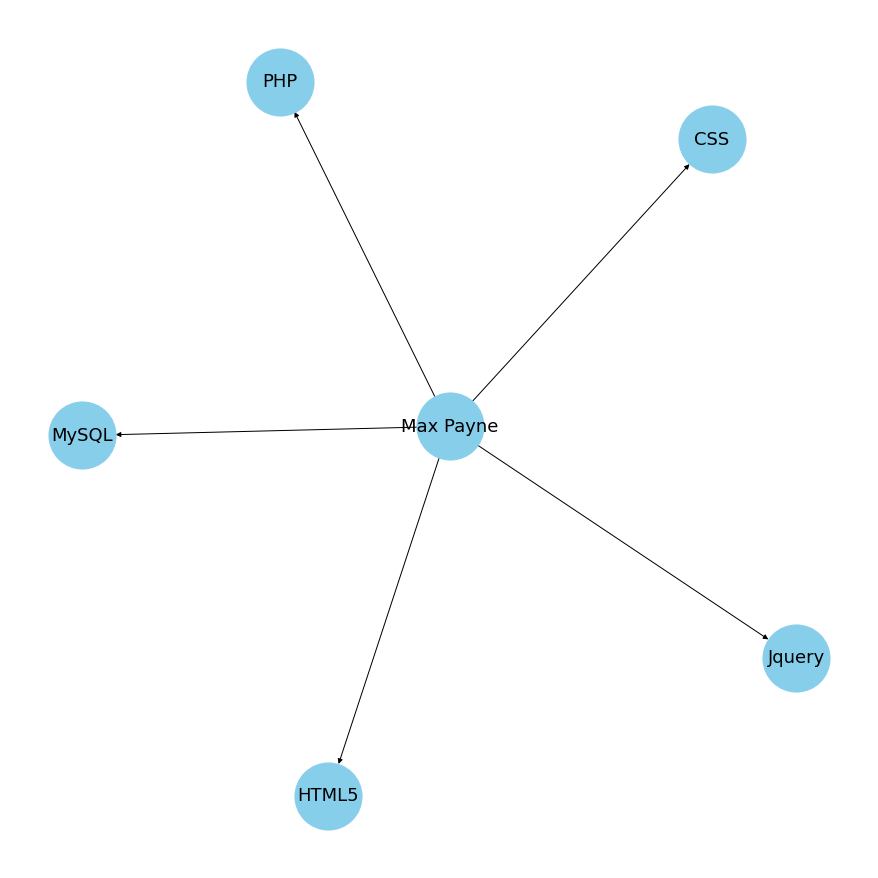

In [176]:
edge_dict = {}
edge_dict[names[2]] = languages_max

draw_graph(edge_dict)

### Knowledge Graph for Multiple Candidates

In [194]:
edge_dict = {}
edge_dict[names[0]] = languages_mathew
edge_dict[names[1]] = languages_john
edge_dict[names[2]] = languages_max

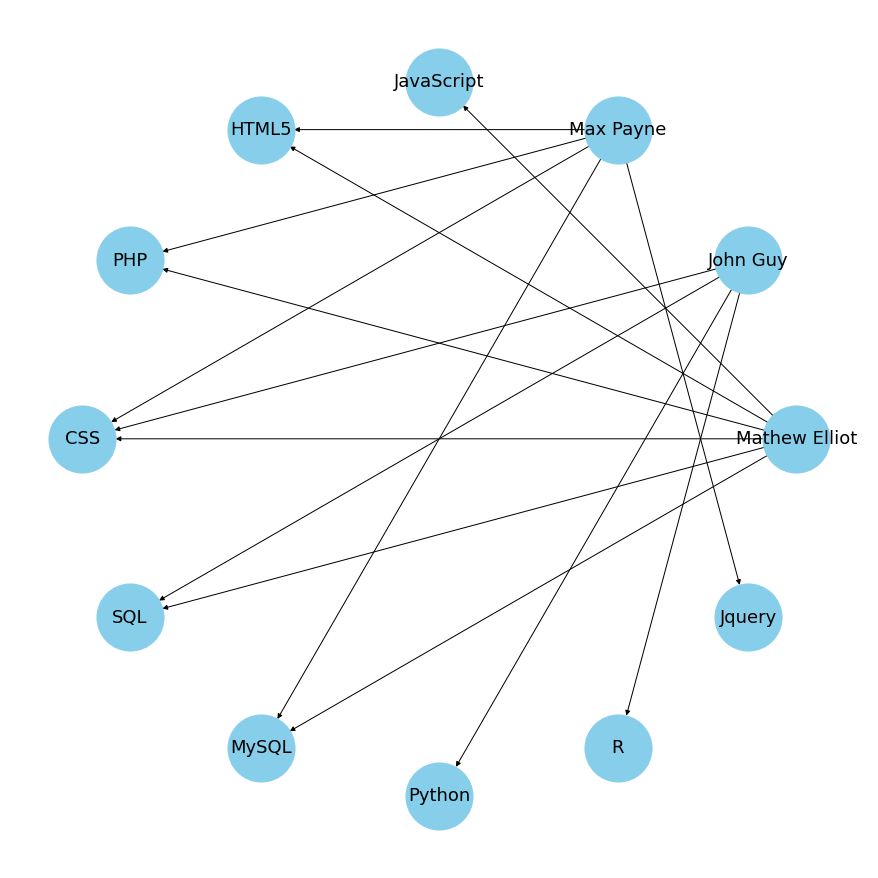

In [195]:
G=nx.from_dict_of_lists(edge_dict, 
                         create_using=nx.MultiDiGraph())

plt.figure(figsize=(12,12))
pos = nx.circular_layout(G) # k regulates the distance between nodes
nx.draw(G, with_labels=True, node_color='skyblue', node_size=4500, edge_cmap=plt.cm.Blues, pos = pos, font_size=18)
plt.show()

## Traversing a Knowledge Graph

In [196]:
def get_max_degree_node(list_of_nodes_to_eliminate, G):
    max_degree=0
    all_remaining_nodes = [x for x in G.nodes() if x not in list_of_nodes_to_eliminate]
    max_node=all_remaining_nodes[0]
    for node in all_remaining_nodes:
            degree = G.degree(node)
            if degree>max_degree:
                    max_degree = degree
                    max_node = node
    return max_degree, max_node


In [197]:
max_skill_degree, max_skill_node = get_max_degree_node(names, G)
print(max_skill_node)
print(max_skill_degree)

CSS
3


In [198]:
skill_list = languages_mathew+languages_john+languages_max
max_languages_degree, max_languages_node = get_max_degree_node(skill_list,G)
print(max_languages_node)
print(max_languages_degree)

Mathew Elliot
6
